In [1]:
# Importing Important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score,cross_val_predict
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file and creating dataframe.
df=pd.read_csv('sbi_life_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0


#### In the given SBI_Life_Insurance Dateset Several Parameters are given and based on those parameters I infer that: 
1) We have to tell whether the person will claim insurance from the company or not.                                  
2) Features/Attributes:                                                                                            
age,                                                                                         
sex(female=0, male=1),                                                                                                   
bmi,                                                                                                      
children,                                                                                            
smoker(non-smoke=0;smoker=1),                                                                                 
region:the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3),            
charges.                                                                                                               
3) Target/Labels: insuranceclaim(yes=1, no=0).                                                                               
4) As our Target value is a categorical data I will use Logistic regression and Classification models.

   #    EDA  ANALYSIS

In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 1338 rows and 8 columns.
df.shape

(1338, 8)

In [4]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [5]:
# Printed the last 10 rows of the dataset
df.tail(10)

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1328,23,0,24.225,2,0,0,22395.74424,0
1329,52,1,38.600,2,0,3,10325.20600,1
1330,57,0,25.740,2,0,2,12629.16560,1
1331,23,0,33.400,0,0,3,10795.93733,1
1332,52,0,44.700,3,0,3,11411.68500,0
1333,50,1,30.970,3,0,1,10600.54830,0
1334,18,0,31.920,0,0,0,2205.98080,1
1335,18,0,36.850,0,0,2,1629.83350,1
1336,21,0,25.800,0,0,3,2007.94500,0
1337,61,0,29.070,0,1,1,29141.36030,1


In [6]:
# Statistical Features Information
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


Information:
1) All the fields are not normally distributed but are very close to it.
2) In some Features(3) outliers are present.

In [7]:
# checking the Features information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


According to the information collected:                                                              
1) No null Data                                                    
2) Object Type= 0                                                             
3) Float Type= 2                                                                   
4) Int Type= 6                                                                         

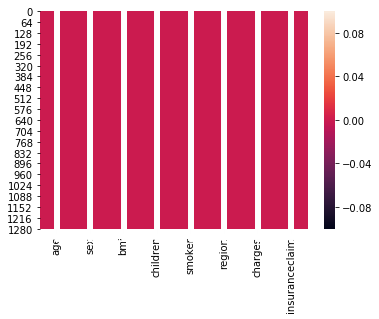

In [8]:
# Checking Heatmap for null values.
sns.heatmap(df.isnull(),annot=True)
# Thus no null values are present.

In [9]:
# Checking the unique values
for col in df.columns.values:
    print("Number of unique values of{} :{} ".format(col,df[col].nunique()))

Number of unique values ofage :47 
Number of unique values ofsex :2 
Number of unique values ofbmi :548 
Number of unique values ofchildren :6 
Number of unique values ofsmoker :2 
Number of unique values ofregion :4 
Number of unique values ofcharges :1337 
Number of unique values ofinsuranceclaim :2 


### Univariate Plots Analysis

In [10]:
# Counting number of different Sex
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

Text(0.5, 6.79999999999999, '0 = No claim , 1 = Claim')

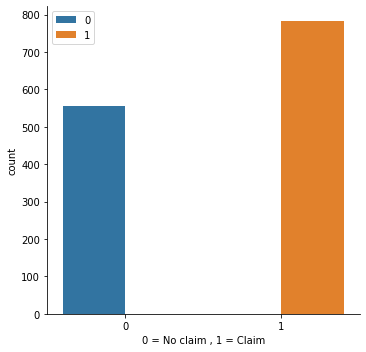

In [11]:
# Plotting number of Sex using catplot.
%matplotlib inline
sns.catplot(x='insuranceclaim',data=df,kind='count',hue='insuranceclaim')
plt.legend()
plt.xlabel("0 = No claim , 1 = Claim")

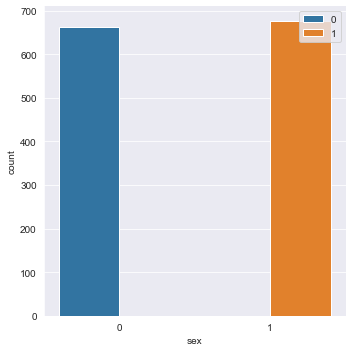

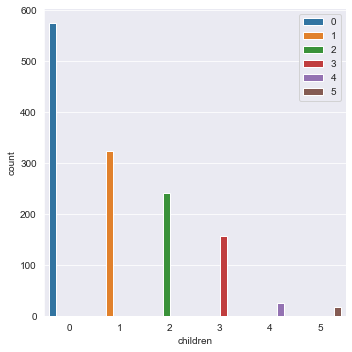

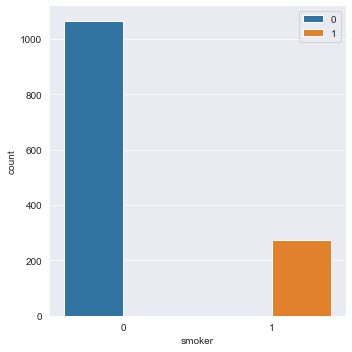

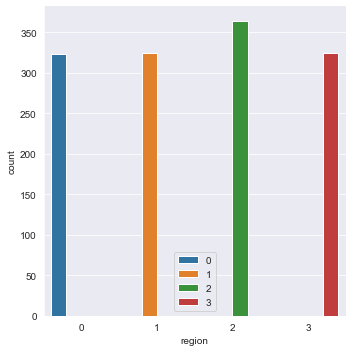

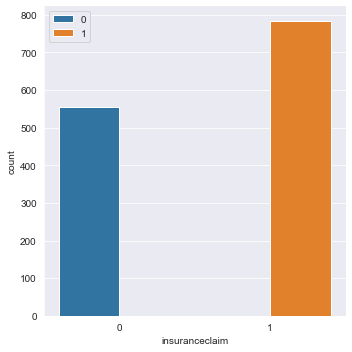

In [12]:
# Function to Count number of persons for each attributes given in the dataset....
model=df.drop(['charges','bmi','age',],axis=1)
models=model.columns.values
sns.set_style("darkgrid")
for i in models:
    sns.catplot(x=i,data=df,kind='count',hue=i)
    #plt.layout(4,4)
    plt.legend()
    plt.tight_layout()
#sex(female=0, male=1),
#bmi,
#children,
#smoker(non-smoke=0;smoker=1),
#region:US (northeast=0, northwest=1, southeast=2, southwest=3),
#insuranceclaim:(yes=1, no=0)

#### Information from graph:                                                                             
1) No. of Males are more than No. of females.                                                 
2) Decreasing Order of No. of persons having children: (0>1>2>3>4>5).                                             
3) No. of persons who dont't smoke are way more than who smoke.                                  
4) Decreasing Order of No. of persons in different regions: (0>1>2>3>4>5)US (northeast=0, northwest=1, southeast=2,outhwest=3)                            
5) No. of persons who claim the insurance are more then who don't.                                

age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
sex               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
bmi               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
children             AxesSubplot(0.125,0.391471;0.227941x0.222059)
smoker            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
region            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
charges                 AxesSubplot(0.125,0.125;0.227941x0.222059)
insuranceclaim       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

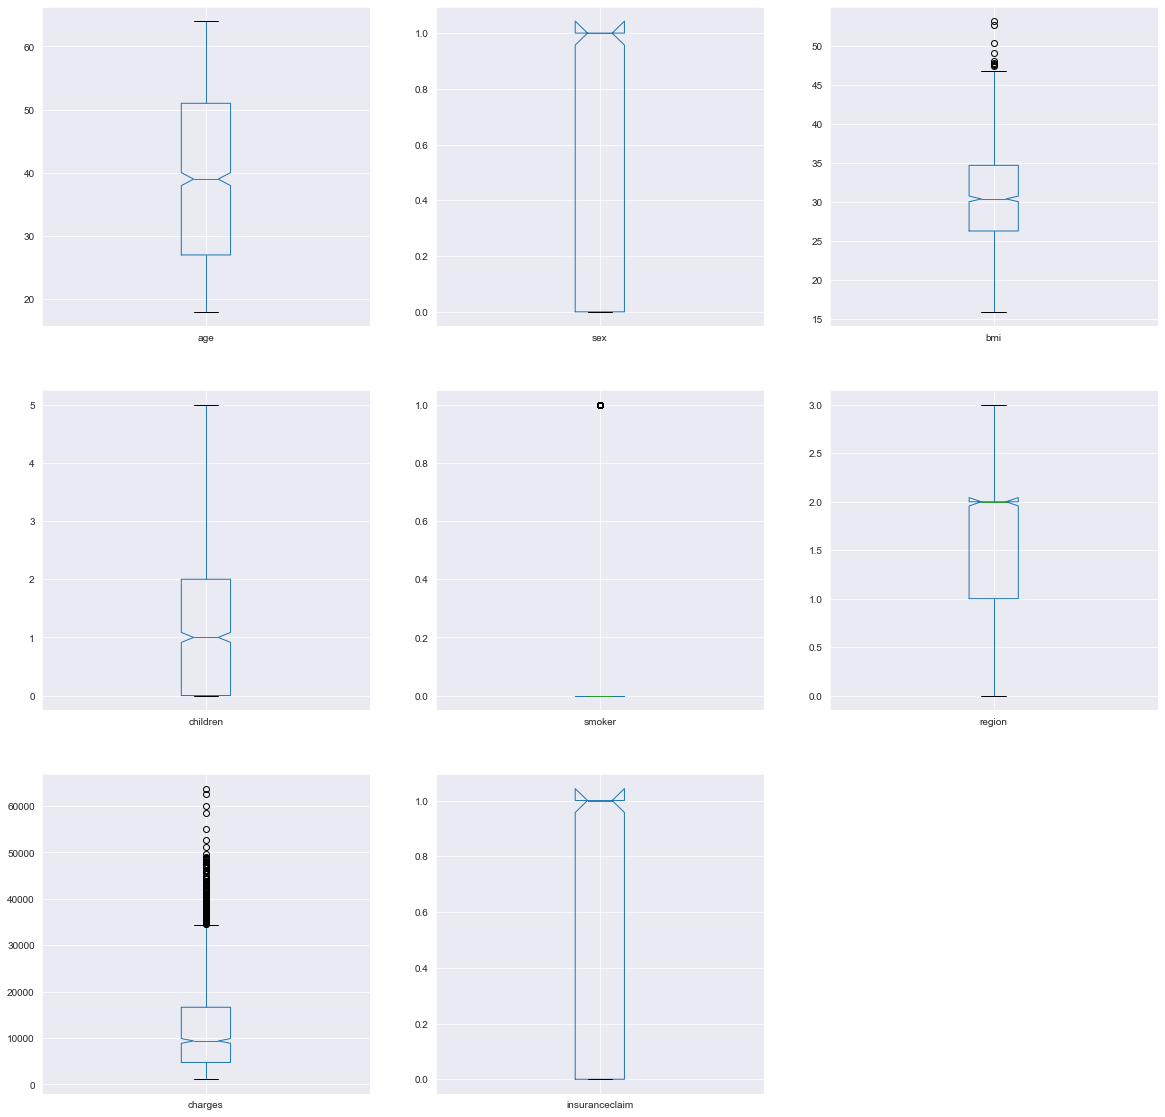

In [13]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True,notch=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018F694E87C8>,
      dtype=object)

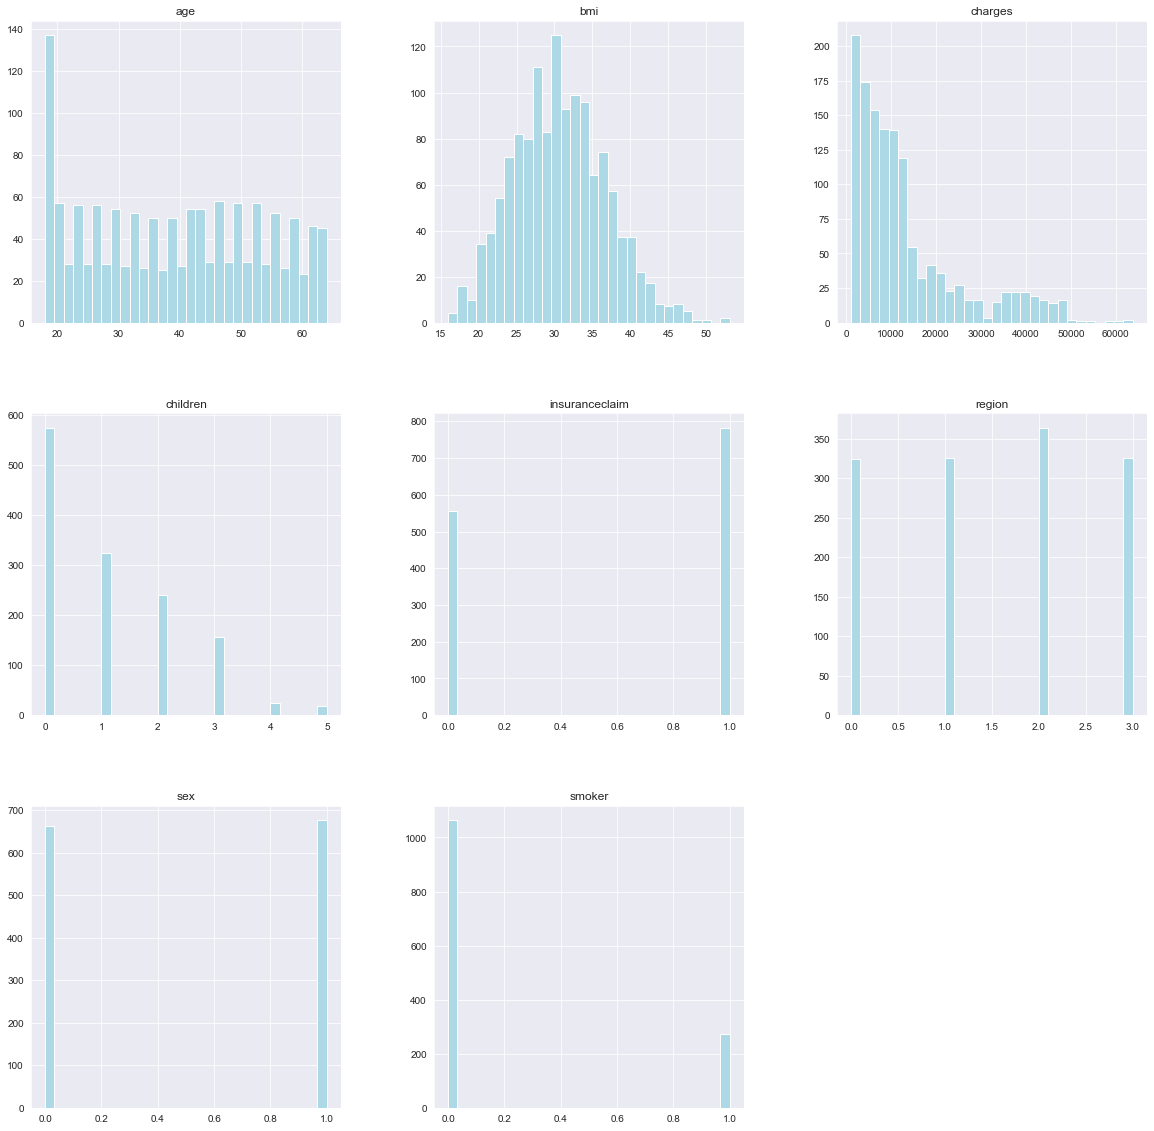

In [14]:
#Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(3,3),bins=30,color='lightblue')

## Bivariate Plots Analysis

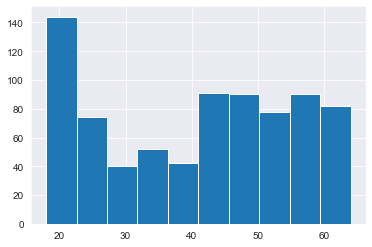

In [15]:
#we will check in which age interval claims are high
plt.hist(x="age",data=df.loc[df["insuranceclaim"]==1])
plt.show()

So, we can see that persons having age 20 claimed more insurance policies.

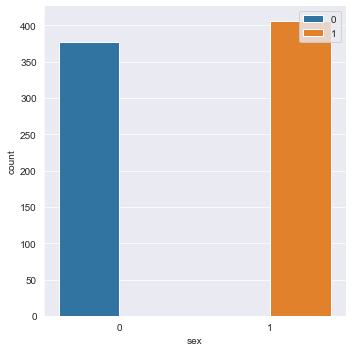

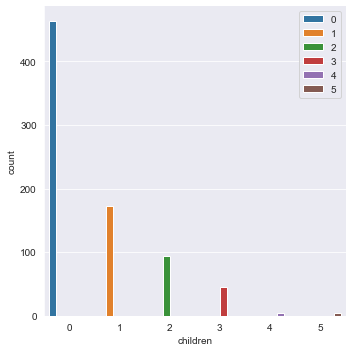

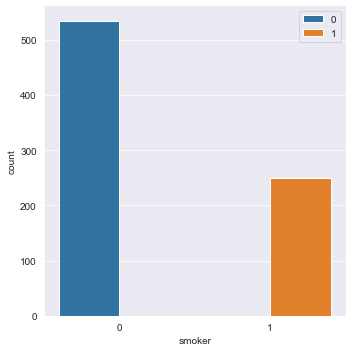

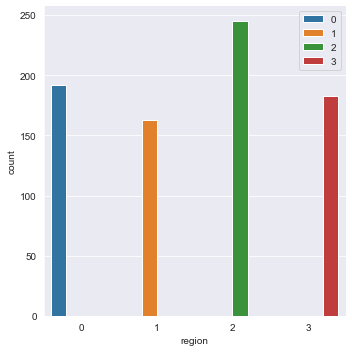

In [16]:
# Function to Count number of persons for each Feature....
m=df.drop(['age','bmi','charges','insuranceclaim'],axis=1).columns.values
for i in m:
    sns.catplot(x=i,data=df.loc[df["insuranceclaim"]==1],hue=i,kind='count')
    plt.legend()
    plt.tight_layout()   
#sex(female=0, male=1),
#bmi,
#children,
#smoker(non-smoke=0;smoker=1),
#region:US (northeast=0, northwest=1, southeast=2, southwest=3),
#insuranceclaim:(yes=1, no=0)

#### Conclusion from the graph:                                                         
1) Highest number of insurance claims are from non-smoker.                            
2) Claims made by persons who dont have a children are higher.                     
3) Highest number of claims are from region 2                                              
4) Highest number of claims are from  Male.                                                          

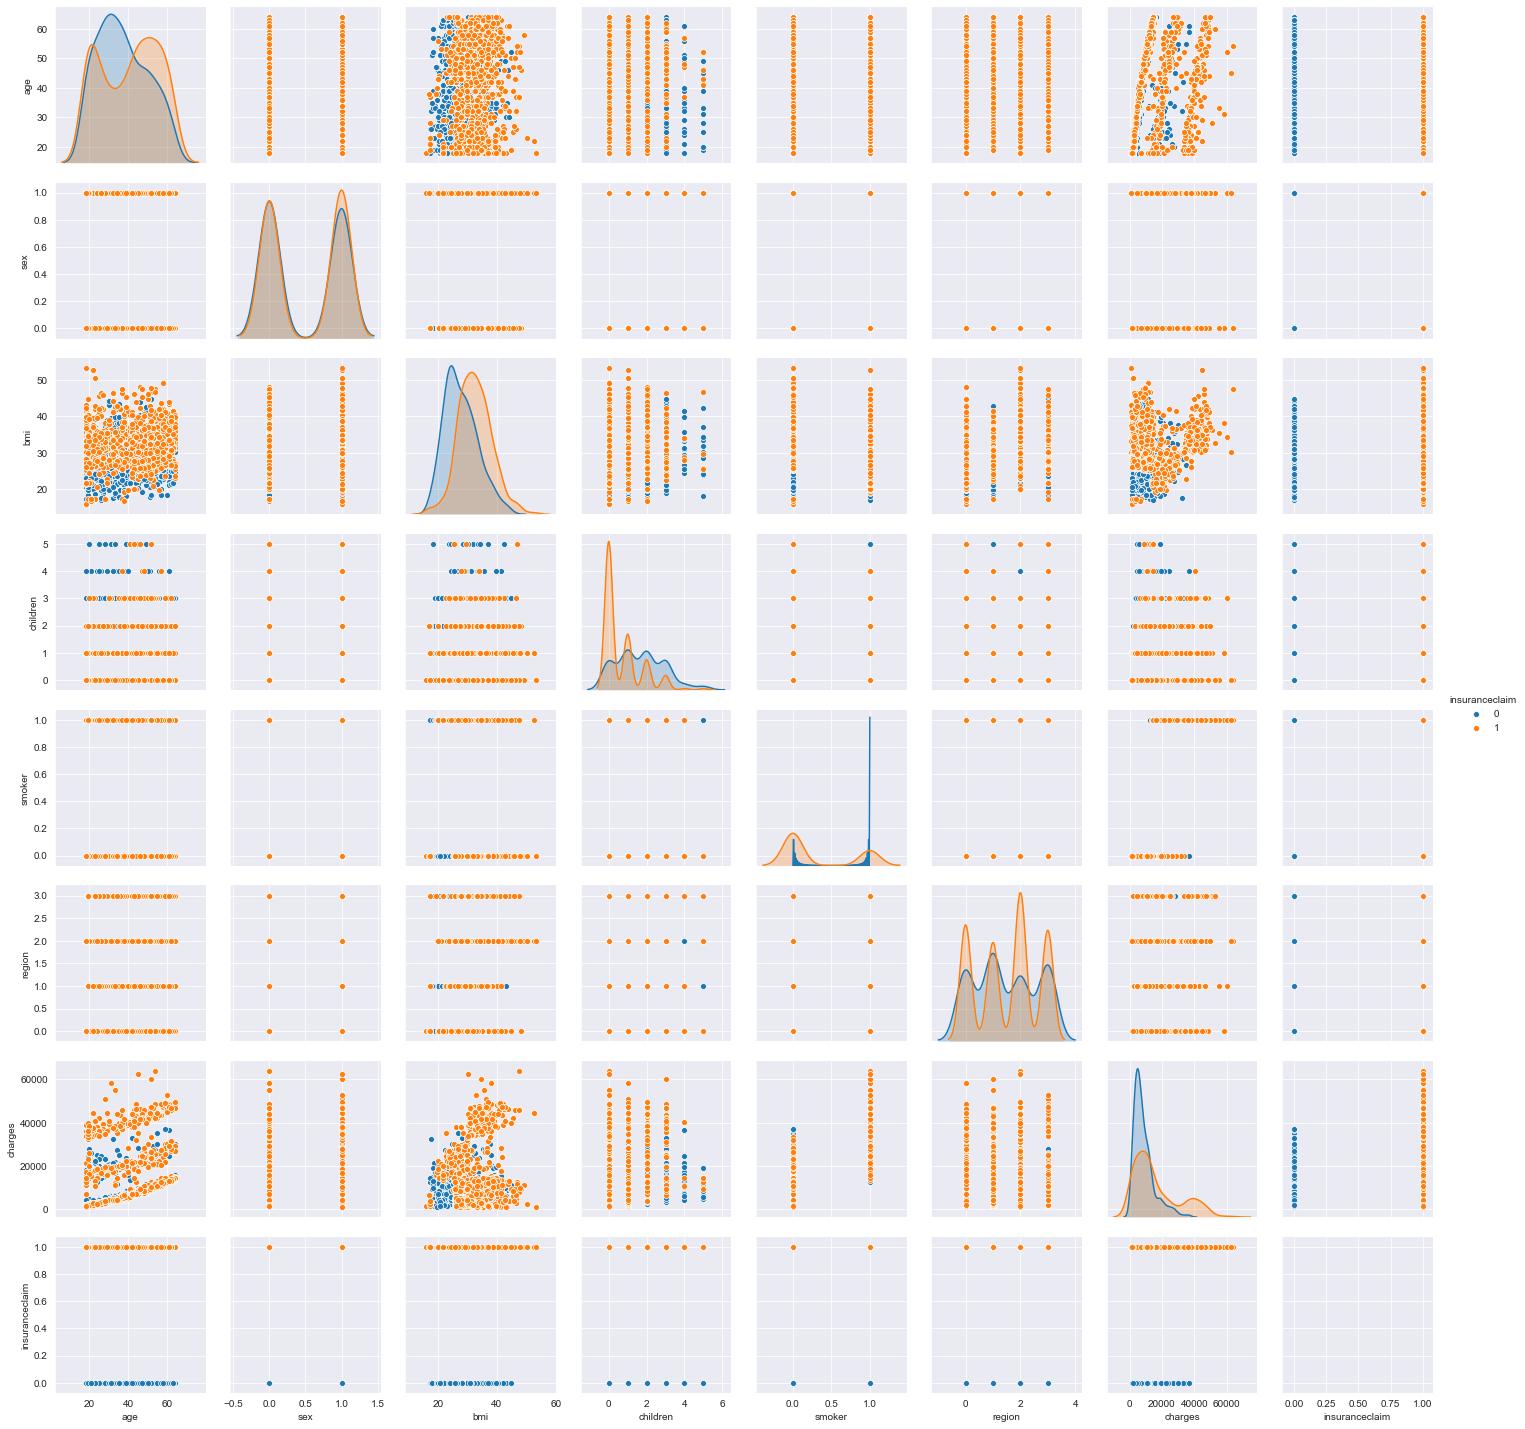

In [17]:
# Plotting the pairplot to analyze correlation between fields
sns.pairplot(df,hue='insuranceclaim',kind='scatter')

In [18]:
# Checking the correlation
corr=df.corr()
corr.style.background_gradient(cmap='YlGnBu').set_precision(2)
# children are having very weak correlation with the target value.

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
age,1,-0.021,0.11,0.042,-0.025,0.0021,0.3,0.11
sex,-0.021,1,0.046,0.017,0.076,0.0046,0.057,0.032
bmi,0.11,0.046,1,0.013,0.0038,0.16,0.2,0.38
children,0.042,0.017,0.013,1,0.0077,0.017,0.068,-0.41
smoker,-0.025,0.076,0.0038,0.0077,1,-0.0022,0.79,0.33
region,0.0021,0.0046,0.16,0.017,-0.0022,1,-0.0062,0.021
charges,0.3,0.057,0.2,0.068,0.79,-0.0062,1,0.31
insuranceclaim,0.11,0.032,0.38,-0.41,0.33,0.021,0.31,1


(8.0, 0.0)

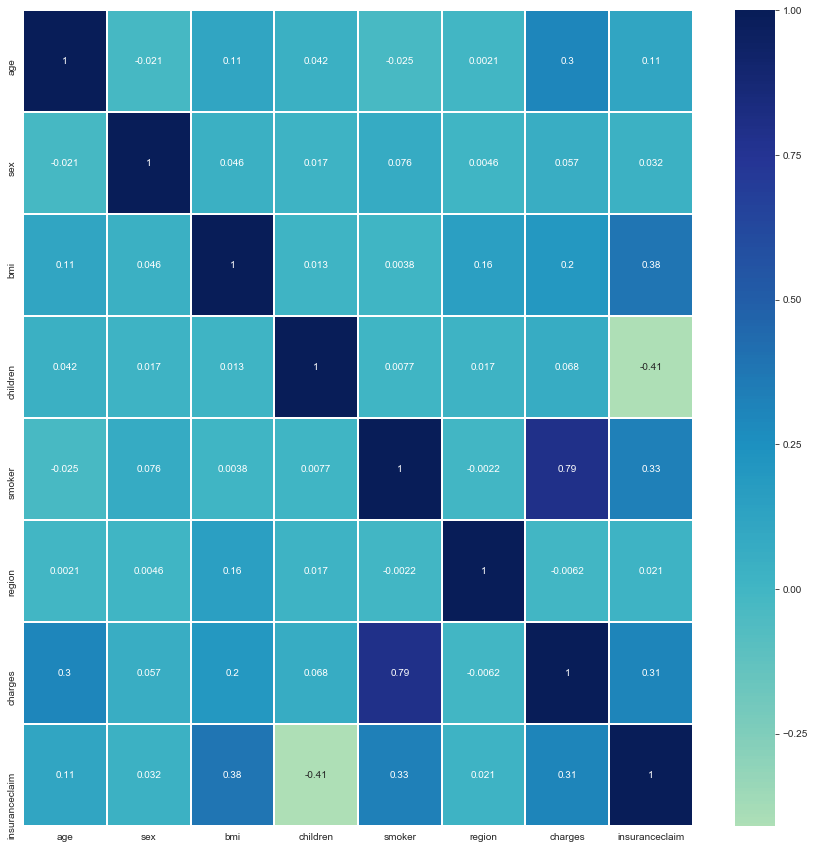

In [19]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Conclusion: children are having very weak correlation with the target value.

In [20]:
# checking the skewness
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.938380
smoker            1.464766
region           -0.038101
charges           1.515880
insuranceclaim   -0.346254
dtype: float64

In [21]:
# Removing Skewness
for i in df.columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [22]:
# checking skewness again
df.skew()

age               0.055673
sex              -0.020951
bmi               0.284047
children          0.264083
smoker            1.464766
region           -0.038101
charges          -0.089817
insuranceclaim   -0.346254
dtype: float64

In [23]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(1338, 8)
(1334, 8)


age                  AxesSubplot(0.125,0.657941;0.227941x0.222059)
sex               AxesSubplot(0.398529,0.657941;0.227941x0.222059)
bmi               AxesSubplot(0.672059,0.657941;0.227941x0.222059)
children             AxesSubplot(0.125,0.391471;0.227941x0.222059)
smoker            AxesSubplot(0.398529,0.391471;0.227941x0.222059)
region            AxesSubplot(0.672059,0.391471;0.227941x0.222059)
charges                 AxesSubplot(0.125,0.125;0.227941x0.222059)
insuranceclaim       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

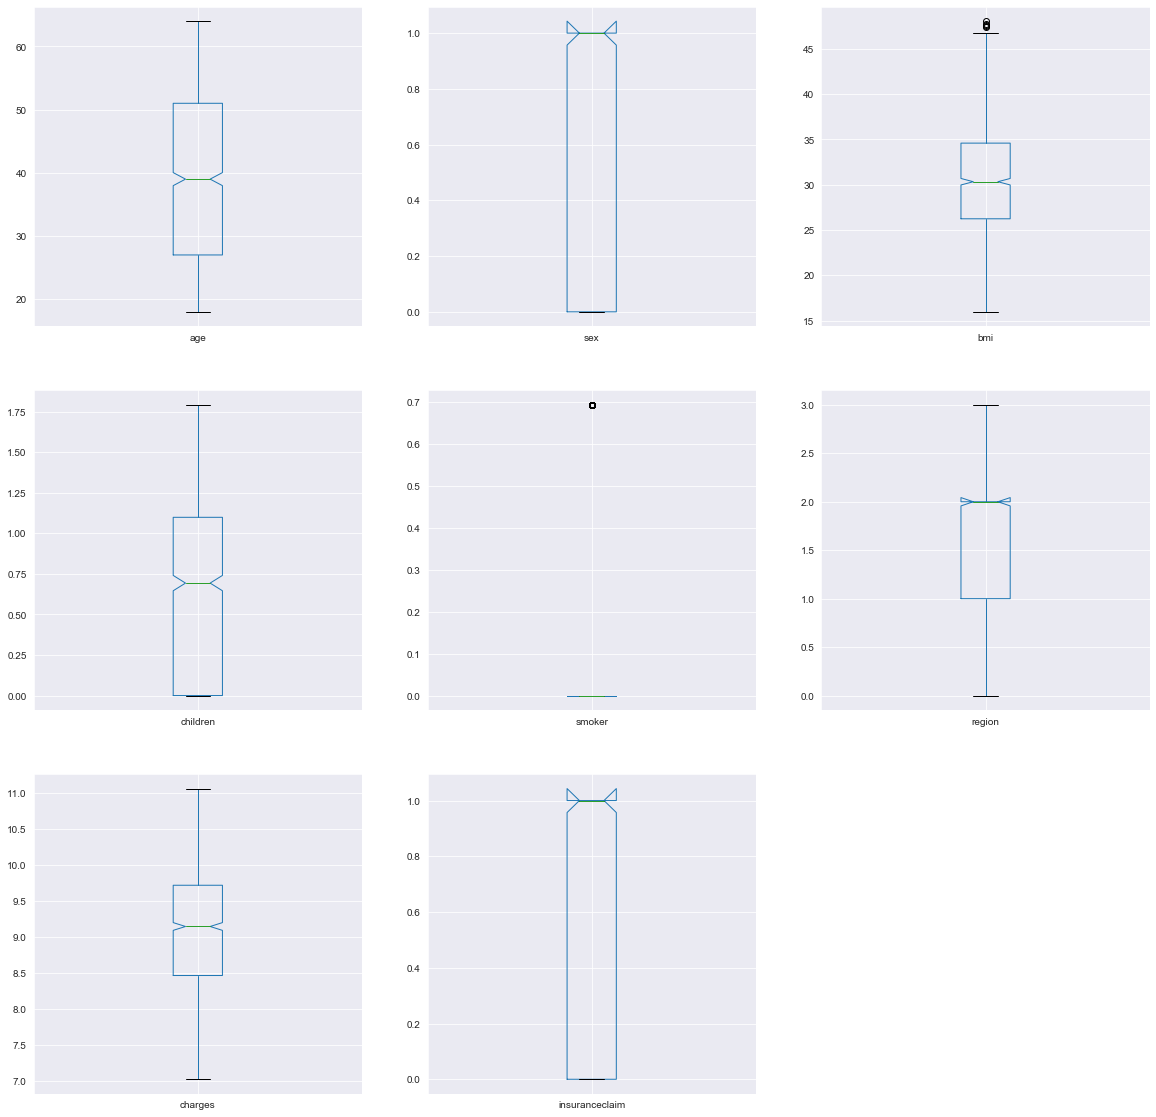

In [24]:
# Plotting the boxplot in order to check few statistical values and outliers
df_new.plot(kind='box', subplots=True, layout=(3,3),figsize=(20,20),grid=True,notch=True)
# I've plotted boxplot again to see whether the outliers removed or not and it is inferred that lots of outliers are removed.

In [25]:
# checking the skewness 
df_new.skew()

age               0.053603
sex              -0.015010
bmi               0.205622
children          0.262249
smoker            1.465804
region           -0.034385
charges          -0.088016
insuranceclaim   -0.341053
dtype: float64

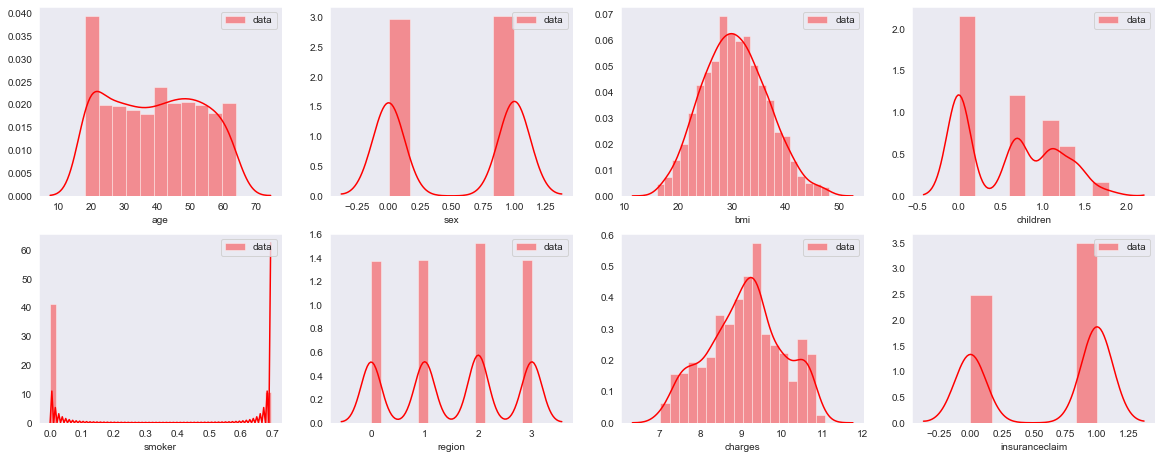

In [26]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(4,4,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [27]:
# Drooping the target value to fit the remaining data into standard scaler 
x1=df_new.drop(['insuranceclaim'],axis=1)
x1
print(x1.shape)

(1334, 7)


In [28]:
# Setting up the Target value in variable y.
y=df_new['insuranceclaim']
y.shape

(1334,)

In [29]:
#scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler() 
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,age,sex,bmi,children,smoker,region,charges
0,-1.442249,-1.007525,-0.450359,-1.042928,1.971407,1.343594,0.691735
1,-1.513528,0.992532,0.528191,0.198200,-0.507252,0.439278,-1.795147
2,-0.800739,0.992532,0.399829,1.439329,-0.507252,0.439278,-0.762508
3,-0.444344,0.992532,-1.316383,-1.042928,-0.507252,-0.465038,0.979538
4,-0.515623,0.992532,-0.286989,-1.042928,-0.507252,-0.465038,-0.915523
...,...,...,...,...,...,...,...
1329,0.767397,0.992532,0.061421,1.439329,-0.507252,-0.465038,0.184097
1330,-1.513528,-1.007525,0.219789,-1.042928,-0.507252,-1.369355,-1.527414
1331,-1.513528,-1.007525,1.041637,-1.042928,-0.507252,0.439278,-1.857348
1332,-1.299692,-1.007525,-0.800436,-1.042928,-0.507252,1.343594,-1.629944


#  Model Training

In [30]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring,cv):
    clf = GridSearchCV(mod,parameters,scoring, cv=10)
    clf.fit(x,y)
    print(clf.best_params_)

In [31]:
#     Grid Search for DecisionTreeClassifier
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy',10)


{'criterion': 'entropy', 'max_depth': 15, 'random_state': 14}


In [32]:
#     Grid Search for GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy',10)


{'learning_rate': 0.1, 'n_estimators': 500}


In [33]:
#     Grid Search for KNeighborsClassifier
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy',10)

{'n_neighbors': 3}


In [35]:
#     Grid Search for SVC
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy',10)

{'gamma': 0.001, 'random_state': 1}


In [36]:
#     Grid Search for LogisticRegression
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy',10)

{'C': 100}


In [37]:
#     Grid Search for RandomForestClassifier
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy',10)

{'max_features': 'auto', 'n_estimators': 200}


In [38]:
#     Grid Search for AdaBoostClassifier
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy',10)

{'n_estimators': 500}


In [39]:
#           Defining Instances For Differnt Models.
KNN=KNeighborsClassifier(n_neighbors=3)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=100)
DT=DecisionTreeClassifier(criterion='entropy',max_depth=15,random_state=14)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.1,n_estimators=500)
RF=RandomForestClassifier(max_features= 'sqrt', n_estimators= 200,)
AD=AdaBoostClassifier(n_estimators=500,)

In [40]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))

In [41]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  46 is: 0.9177057356608479


Learning Score :  0.9410503751339764
Accuracy Score :  0.9177057356608479
Cross Val Score :  0.889831770743004
roc auc score :  0.9097702031833769


Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       167
           1       0.91      0.96      0.93       234

    accuracy                           0.92       401
   macro avg       0.92      0.91      0.91       401
weighted avg       0.92      0.92      0.92       401



Confusion Matrix:
 [[144  23]
 [ 10 224]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weight

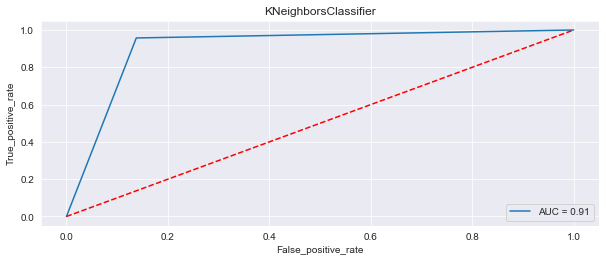

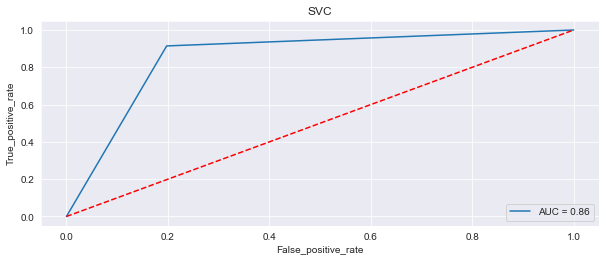

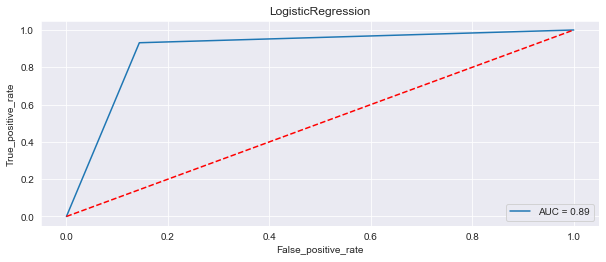

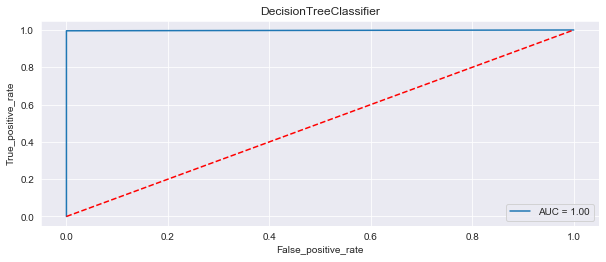

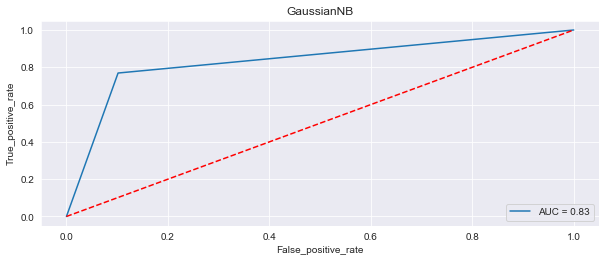

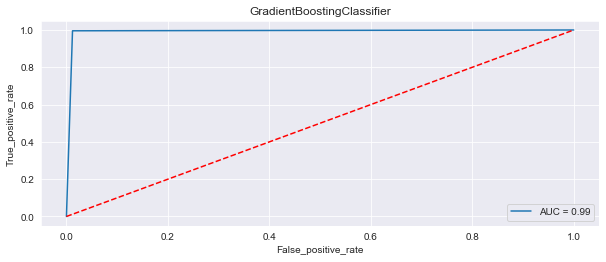

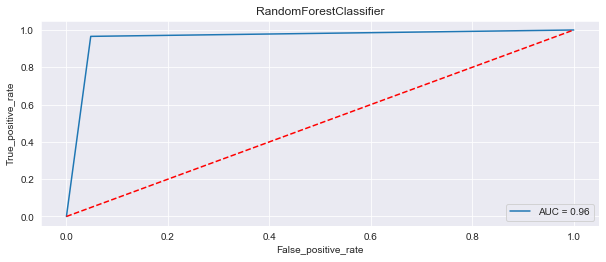

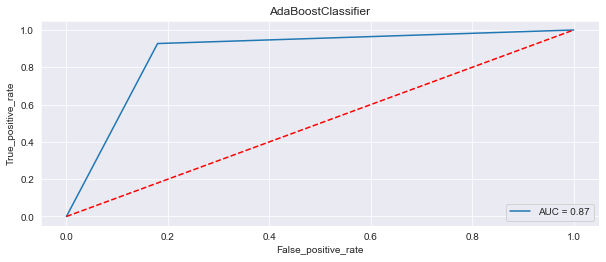

In [51]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#   Roc auc score    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')
    

In [52]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score':Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,'Roc_Auc_curve':rocscore})   #
result

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,94.105038,91.770574,88.983177,90.977020
1,SVC,83.708467,86.783042,84.933042,85.846256
2,LogisticRegression,85.530547,90.024938,87.178020,89.395568
3,DecisionTreeClassifier,100.000000,99.750623,98.652228,99.786325
4,GaussianNB,78.456592,82.294264,79.385931,83.371718
5,GradientBoostingClassifier,100.000000,99.251870,98.800342,99.187522
6,RandomForestClassifier,100.000000,96.009975,95.655319,95.895389
7,AdaBoostClassifier,92.926045,88.279302,86.063148,87.385485


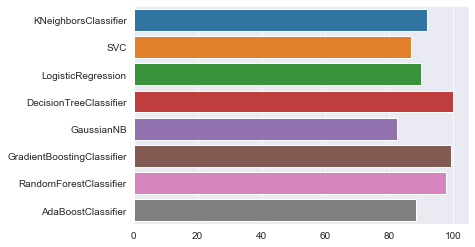

In [44]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)


### After all this process conclusion is that DecisionTreeClassifier is performing excellent as accuracy score is 99.7%.

In [45]:
# Using DecisionTreeClassifier for final model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=76,test_size=.30,stratify=y)
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=15,random_state=14)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
dtcpred=dtc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,dtcpred))
print('Confusion Matrix:',confusion_matrix(y_test,dtcpred))
print('Classification Report:',classification_report(y_test,dtcpred))

Accuracy Score: 0.9975062344139651
Confusion Matrix: [[167   0]
 [  1 233]]
Classification Report:               precision    recall  f1-score   support

           0       0.99      1.00      1.00       167
           1       1.00      1.00      1.00       234

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



(2.0, 0.0)

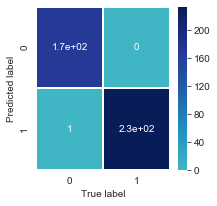

In [46]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, dtcpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [47]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=dtcpred
test
# On the lest side values are those which are taken by machine for test...

,insuranceclaim,Predicted values
937,0,0
114,0,0
524,1,1
1056,1,1
481,1,1
...,...,...
1138,1,1
264,0,0
330,1,1
94,1,1


In [48]:
# Saving the Predicted values in csv file
test.to_csv('SBI_LIFE.csv') 

In [49]:
from sklearn.externals import joblib
joblib.dump(dtc,'Project_2_SBI_INS.pkl')

['Project_2_SBI_INS.pkl']

In [50]:
final=joblib.load('Project_2_SBI_INS.pkl')
final.predict(x_test)

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,

## Conclusion:

1) Highest number of insurance claims are from non-smoker.                                            
2) Claims made by persons who dont have a children are higher.                                                      
3) Highest number of claims are from region 2.                                                     
4) Highest number of claims are from Male. 
5) Persons having age group 20 claimed more insurance policies than the rest age groups.

## Steps Followed:      

1) Data Analysis.                                                                            
2) EDA Analysis.                                                                          
3) Best parameters are found using Gridsearch cv and applied to models.                                                        
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.           
5) AUC ROC Curves are made for each model.                                             
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.                           
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.      
8) Predicted values are saved in SBI_LIFE.csv file.                                   
9) Pickle file is named with Project_2_SBI_INS.pkl                            
